<a href="https://colab.research.google.com/github/iasminqmoura/ia_2023/blob/main/Lista_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


In [9]:
portas_logicas = {
    "E": lambda x: int(all(x)),
    "OU": lambda x: int(any(x)),
    "XOU": lambda x: int(sum(x) % 2 == 1),
    "NÃO_E": lambda x: int(not all(x)),
    "NÃO_OU": lambda x: int(not any(x)),
    "NÃO_XOU": lambda x: int(sum(x) % 2 == 0),
}

In [10]:
def gerar_dados(porta_logica, num_amostras=100):
    tamanho_entrada = len(porta_logica.__code__.co_varnames) - 1
    entradas = torch.randint(0, 2, (num_amostras, tamanho_entrada), dtype=torch.float32)
    saidas = torch.tensor([porta_logica(entrada) for entrada in entradas], dtype=torch.float32).view(-1, 1)
    return entradas, saidas

In [11]:
class ModeloPortaLogica(nn.Module):
    def __init__(self, tamanho_entrada):
        super(ModeloPortaLogica, self).__init__()
        self.linear = nn.Linear(tamanho_entrada, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [12]:
def treinar(modelo, entradas, saidas, num_epocas=500, taxa_aprendizado=0.1):
    criterio = nn.BCELoss()
    otimizador = optim.SGD(modelo.parameters(), lr=taxa_aprendizado)

    erros = []

    for epoca in range(num_epocas):
        otimizador.zero_grad()
        previsoes = modelo(entradas)
        perda = criterio(previsoes, saidas)
        perda.backward()
        otimizador.step()

        erros.append(perda.item())

        if epoca % 10 == 0:
            print(f"Época {epoca}/{num_epocas} Perda: {perda.item()}")
            print(f"   Parâmetros do Modelo: {list(modelo.parameters())}")

    return erros

In [13]:
def mostrar_resultados(erros, previsoes, saidas):
    clear_output(wait=True)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(erros)
    plt.title("Erro ao longo das épocas")
    plt.xlabel("Época")
    plt.ylabel("Erro")

    plt.subplot(1, 2, 2)
    plt.scatter(previsoes, saidas)
    plt.title("Classificação da Rede Neural")
    plt.xlabel("Saída da Rede Neural")
    plt.ylabel("Saída Esperada")

    plt.tight_layout()
    plt.show()

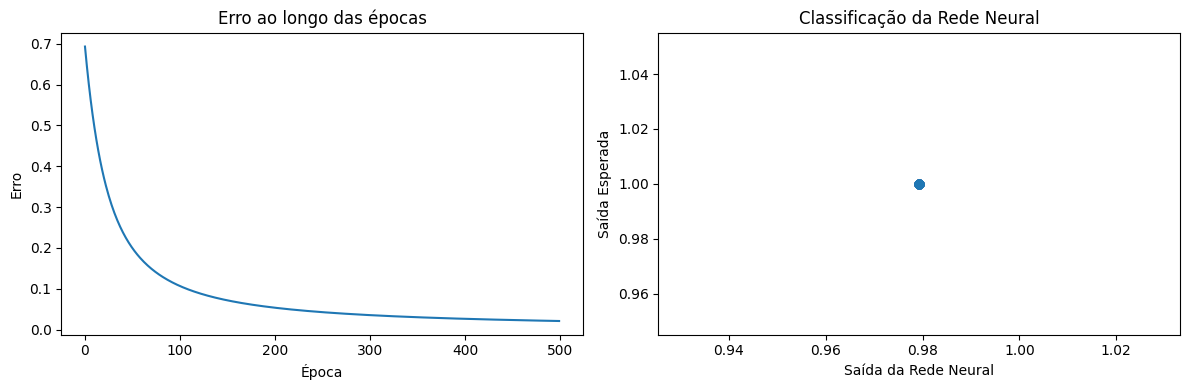

In [14]:
for nome_porta, porta_logica in portas_logicas.items():
    print(f"\nTreinando modelo para a porta lógica {nome_porta}")
    entradas, saidas = gerar_dados(porta_logica)
    tamanho_entrada = entradas.shape[1]
    modelo = ModeloPortaLogica(tamanho_entrada)
    erros = treinar(modelo, entradas, saidas)
    previsoes = modelo(entradas).detach().numpy()
    mostrar_resultados(erros, previsoes, saidas)